In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold


In [83]:
df= pd.read_csv('/content/Depression Student Dataset.csv')

In [84]:
df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [86]:
df.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [87]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


In [88]:
# Encode categorical columns
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])
df['Have you ever had suicidal thoughts ?'] = le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness'] = le.fit_transform(df['Family History of Mental Illness'])
df['Depression'] = le.fit_transform(df['Depression'])


In [89]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,7-8 hours,1,1,9,2,1,0
1,1,28,4.0,5.0,5-6 hours,0,1,7,1,1,0
2,1,25,1.0,3.0,5-6 hours,2,1,10,4,0,1
3,1,23,1.0,4.0,More than 8 hours,2,1,7,2,1,0
4,0,31,1.0,5.0,More than 8 hours,0,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,More than 8 hours,2,0,8,3,0,1
498,1,24,2.0,1.0,Less than 5 hours,2,1,8,5,0,1
499,0,23,3.0,5.0,5-6 hours,0,0,1,5,1,0
500,1,33,4.0,4.0,More than 8 hours,0,0,8,1,1,0


In [103]:
df['Sleep Duration'].unique()

array([7.5, 5.5, 9. , 4. ])

In [90]:
sleep_mapping = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)


In [91]:
df['Study_Pressure_Hours'] = df['Study Hours'] * df['Academic Pressure']


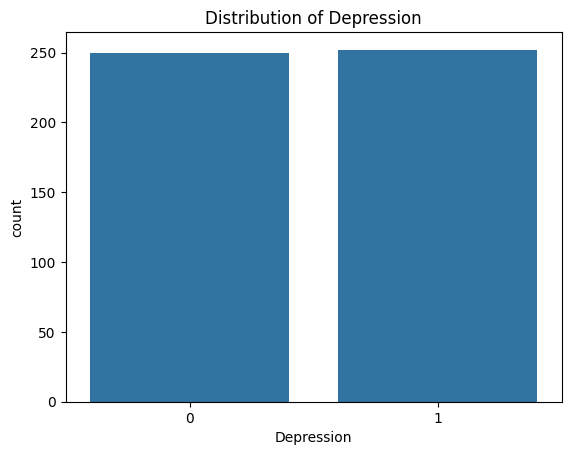

In [92]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression')
plt.show()


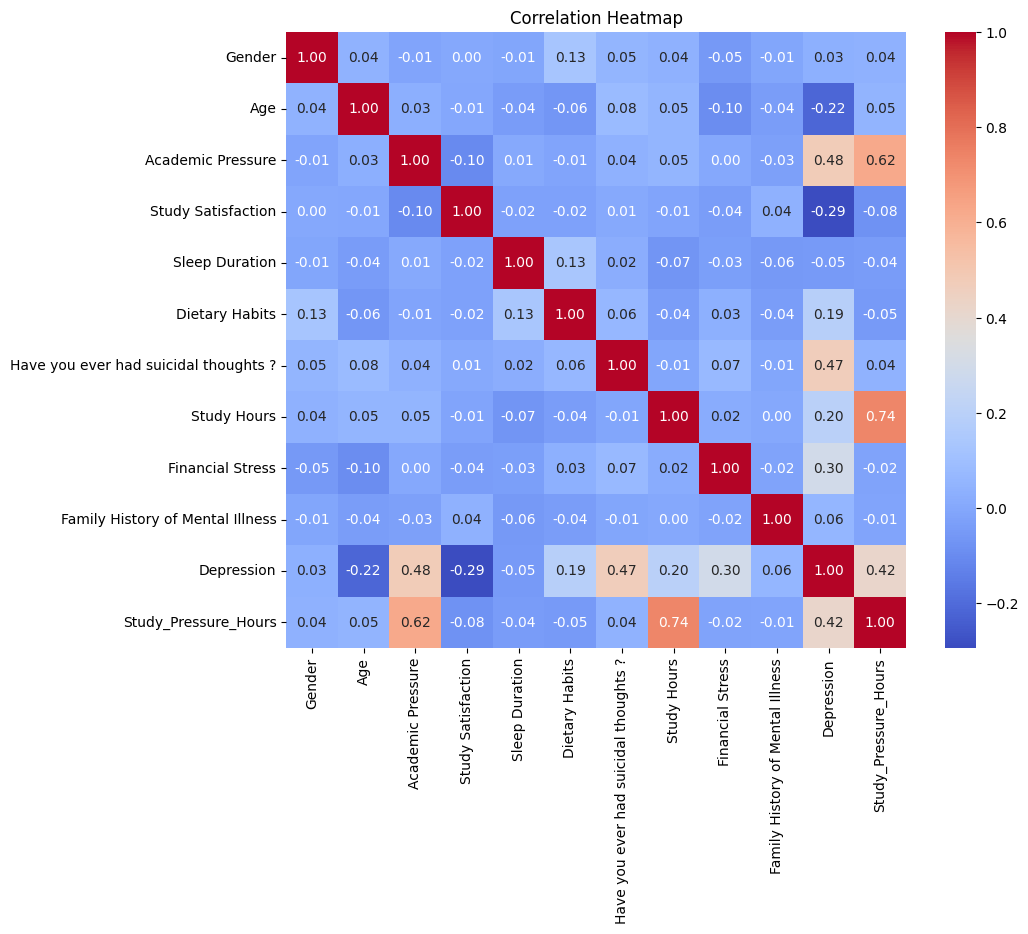

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


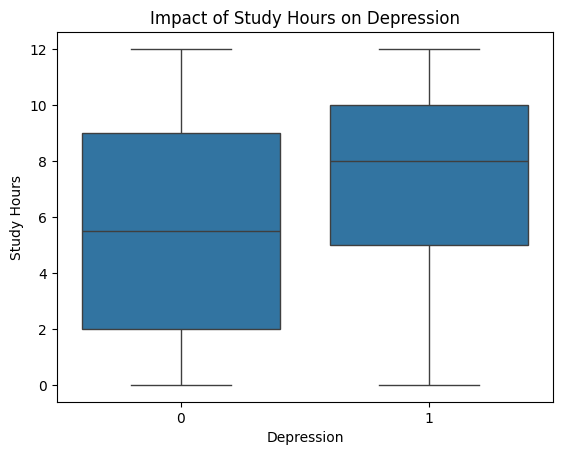

In [94]:
sns.boxplot(x='Depression', y='Study Hours', data=df)
plt.title('Impact of Study Hours on Depression')
plt.show()


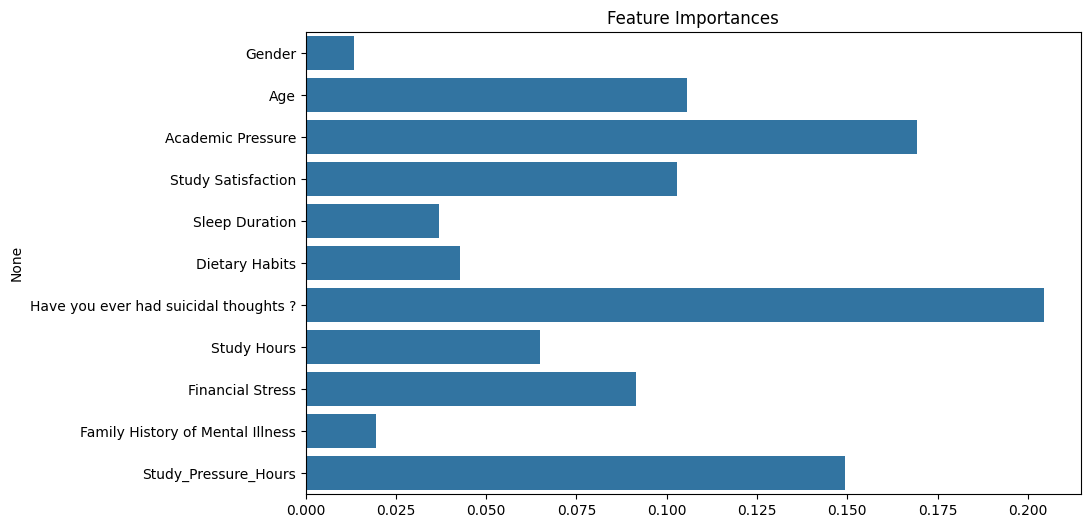

In [95]:
# Feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()


In [96]:
X = df.drop('Depression', axis=1)  # Features
y = df['Depression']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [98]:
# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9108910891089109


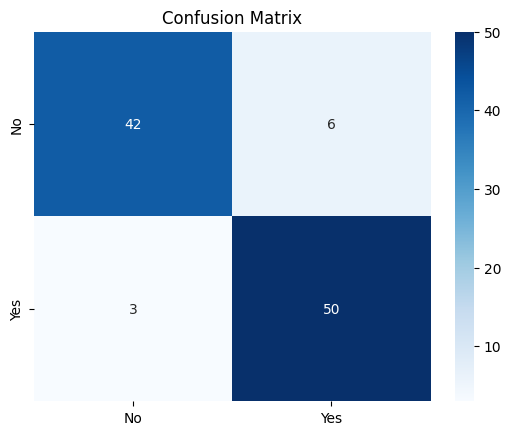

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        48
           1       0.89      0.94      0.92        53

    accuracy                           0.91       101
   macro avg       0.91      0.91      0.91       101
weighted avg       0.91      0.91      0.91       101



In [99]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy Score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [100]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply scaling
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'Fold accuracy: {accuracy_score(y_test, y_pred)}')


Fold accuracy: 0.9019607843137255
Fold accuracy: 0.8823529411764706
Fold accuracy: 0.96
Fold accuracy: 0.86
Fold accuracy: 0.86
Fold accuracy: 0.92
Fold accuracy: 0.84
Fold accuracy: 0.88
Fold accuracy: 0.92
Fold accuracy: 0.86


In [104]:
def predict_depression(model, scaler):
    print("Please provide the following details:")

    # Collecting input features
    gender = input("Gender (Male/Female): ").strip().lower()
    age = int(input("Age: "))
    academic_pressure = float(input("Academic Pressure (1 to 5): "))
    study_satisfaction = float(input("Study Satisfaction (1 to 5): "))
    sleep_duration = input("Sleep Duration (Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours): ").strip()
    dietary_habits = input("Dietary Habits (Healthy/Unhealthy): ").strip().lower()
    suicidal_thoughts = input("Have you ever had suicidal thoughts? (Yes/No): ").strip().lower()
    study_hours = int(input("Study Hours per day: "))
    financial_stress = int(input("Financial Stress (1 to 5): "))
    family_history = input("Family History of Mental Illness? (Yes/No): ").strip().lower()
    study_pressure_hours = int(input("Study Pressure Hours: "))  # This is the 11th column

    # Map the categorical inputs
    gender = 1 if gender == 'male' else 0
    dietary_habits = 1 if dietary_habits == 'healthy' else 0
    suicidal_thoughts = 1 if suicidal_thoughts == 'yes' else 0
    family_history = 1 if family_history == 'yes' else 0

    # Map sleep duration
    sleep_mapping = {
        'less than 5 hours': 4,
        '5-6 hours': 5.5,
        '7-8 hours': 7.5,
        'more than 8 hours': 9
    }
    sleep_duration = sleep_mapping.get(sleep_duration.lower(), 7.5)  # Default to 7.5 hours if invalid input

    # Create the feature array (similar to the training set)
    input_data = np.array([[gender, age, academic_pressure, study_satisfaction, sleep_duration,
                            dietary_habits, suicidal_thoughts, study_hours, financial_stress, family_history,
                            study_pressure_hours]])

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = model.predict(input_data_scaled)
    print(f"prediction value is {prediction}")

    # Output the result
    if prediction == 1:
        print("\nThe model predicts that this person may suffer from depression.")
    else:
        print("\nThe model predicts that this person is less likely to suffer from depression.")


In [105]:
# Assuming your model is trained and scaler is fitted
predict_depression(model, scaler)


Please provide the following details:
Gender (Male/Female): female
Age: 19
Academic Pressure (1 to 5): 3
Study Satisfaction (1 to 5): 3
Sleep Duration (Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours): 8
Dietary Habits (Healthy/Unhealthy): Healthy
Have you ever had suicidal thoughts? (Yes/No): No
Study Hours per day: 5
Financial Stress (1 to 5): 1
Family History of Mental Illness? (Yes/No): No
Study Pressure Hours: 2
prediction value is [0]

The model predicts that this person is less likely to suffer from depression.


In [ ]:
X